In [33]:
from model import SIR_model_adapted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from spain_data import S

We have to guess the values of the parameters of the model. It is not an easy task due the nature of the dataset.
The governments are collecting the data related to their country.

# Model parameters

In [34]:
rr = 0.1424 #value for mean rr in South Korea, check get_parameter_rr notebook
maxtr = 0.3371 #value for tr before quarantine in spain check get_parameter_trmin_trmax
mintr = 0.0858 #value for severe quarantine in Italy check get get_parameter_trmin_trmax

a = 6 #dont know the value yet, aprox 6 days of incubation https://www.worldometers.info/coronavirus/coronavirus-incubation-period/
b = 9 #no one knows

mindr = 0.01 #a study say the death rate in wuhan was 1.4%, but the sanitary system collapsed few days.So I will guess around 1% if no collapse is done
maxdr = 0.03 #dont know yet, but if the sanitary system is collapsed 3% is not crazy

Icol = 0.01 #1% of infected in Spain, less for sure...
inf_test = 0.05 #Timothy Rusell suggest that only a 5% of infected is diagnosticated in Spain

# Model

In [35]:
#Government action in the coming days, if 1 then tr is lowest, if 0 then tr is maximum.

#simulation

system_control = [0.6,0.7,0.8,0.8,0.8,0.8,0.8,0.8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                  1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [36]:
sir = SIR_model_adapted(a, b, mintr, maxtr, rr, mindr, maxdr, Icol, inf_test)
y = sir.run(system_control)

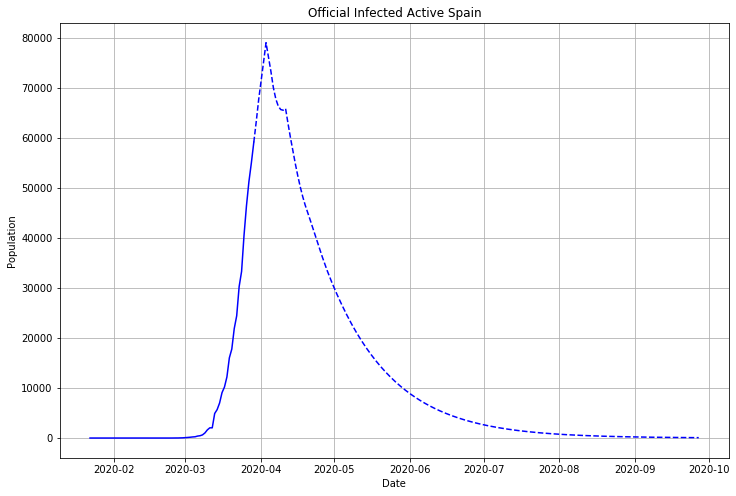

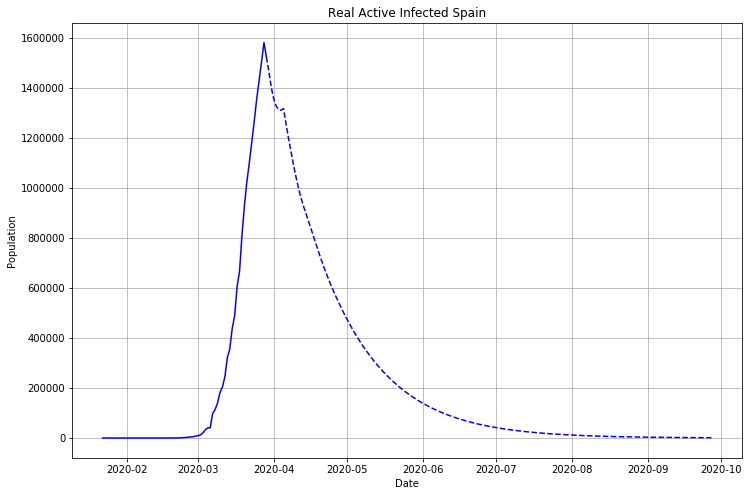

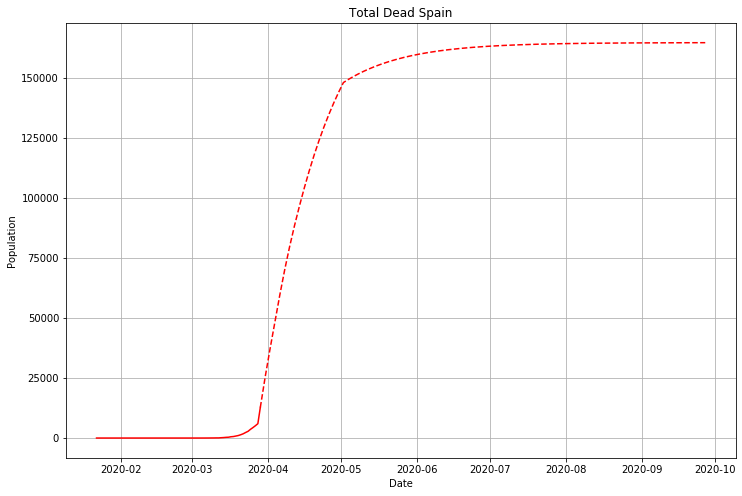

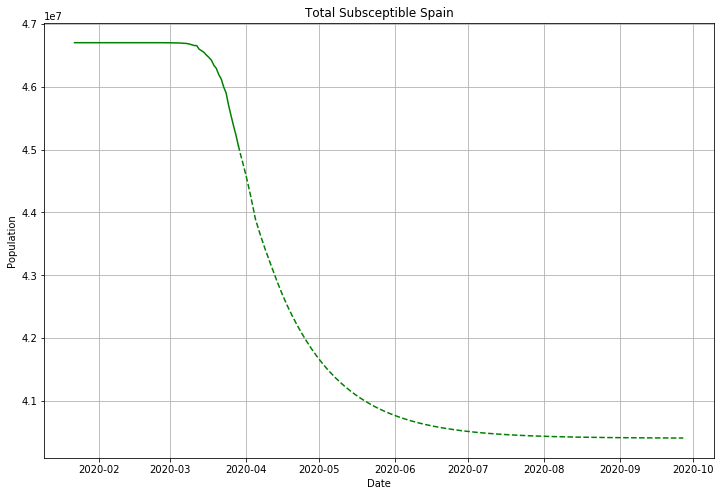

In [37]:
start = datetime.datetime(2020, 1, 22)
t = np.array([start + datetime.timedelta(days=i) for i in range(len(system_control)+len(S))])

N = 46700000 #population spain

s = np.array(y[0].copy())
i = np.array(y[1].copy())
d = np.array(y[3].copy())
oi = np.array(y[4].copy())

s_live = s[:len(S)+1]
i_live = i[:len(S)+1]
d_live = d[:len(S)+1]
oi_live = oi[:len(S)+1]

s_pred = s[len(S):]
i_pred = i[len(S):]
d_pred = d[len(S):]
oi_pred = oi[len(S):]

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
ax.plot(t[:len(S)+1], oi_live*N, color='blue')
ax.plot(t[len(S):], oi_pred*N, color='blue',ls='--')

# Set title and labels for axes
ax.set(xlabel="Date", ylabel="Population", title="Official Infected Active Spain")
plt.grid()
plt.show()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
ax.plot(t[:len(S)+1], i_live*N, color='blue')
ax.plot(t[len(S):], i_pred*N, color='blue',ls='--')

# Set title and labels for axes
ax.set(xlabel="Date", ylabel="Population", title="Real Active Infected Spain")
plt.grid()
plt.show()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
ax.plot(t[:len(S)+1], d_live*N, color='red')
ax.plot(t[len(S):], d_pred*N, color='red',ls='--')

# Set title and labels for axes
ax.set(xlabel="Date", ylabel="Population", title="Total Dead Spain")
plt.grid()
plt.show()

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 8))

# Add x-axis and y-axis
ax.plot(t[:len(S)+1], s_live*N, color='green')
ax.plot(t[len(S):], s_pred*N, color='green',ls='--')

# Set title and labels for axes
ax.set(xlabel="Date", ylabel="Population", title="Total Subsceptible Spain")
plt.grid()
plt.show()